<b> Principal Component Analysis </b>
<table style="width:50%">
<tr>
    <th>mouse</th>    
    <th>gene1</th>
    <th>gene2</th>
</tr>
<tr>
    <th>1</th>
    <th>10</th>
    <th>6</th>
</tr>
<tr>
    <th>2</th>
    <th>11</th>
    <th>4</th>
</tr>
<tr>
    <th>3</th>
    <th>8</th>
    <th>5</th>
</tr>
<tr>
    <th>4</th>
    <th>3</th>
    <th>3</th>
</tr>
<tr>
    <th>5</th>
    <th>1</th>
    <th>2.8</th>
</tr>
<tr>
    <th>6</th>
    <th>2</th>
    <th>1</th>
</tr>
</table>

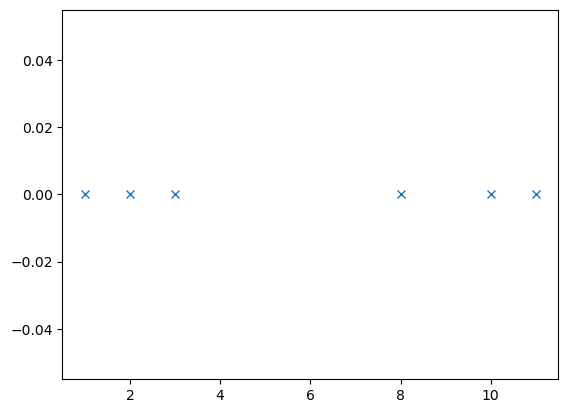

In [11]:
from matplotlib import pyplot as plt
import numpy as np
gene1 = [10, 11, 8, 3, 1, 2]
val = 0
plt.plot(gene1, np.zeros_like(gene1) + val, 'x')

Mice 1, 2 and 3 are more similar to each other than they are to mice 4, 5 and 6. If we measure 2 genes we can do a 2D plot of this.

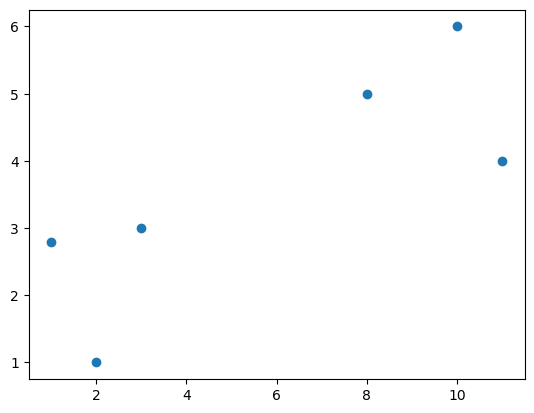

In [12]:
gene1 = [10, 11, 8, 3, 1 ,2]
gene2 = [6, 4, 5, 3, 2.8, 1]
plt.scatter(gene1, gene2)

<ul>
    <li> PCA can tell us which gene or variable is the most valuable for clustering data</li>
    <li> For example, PCA could tell is that Gene3 is responsible for separating samples along the x-axis</li>
    </ul>

To understand PCA we will consider the dataset with two genes.

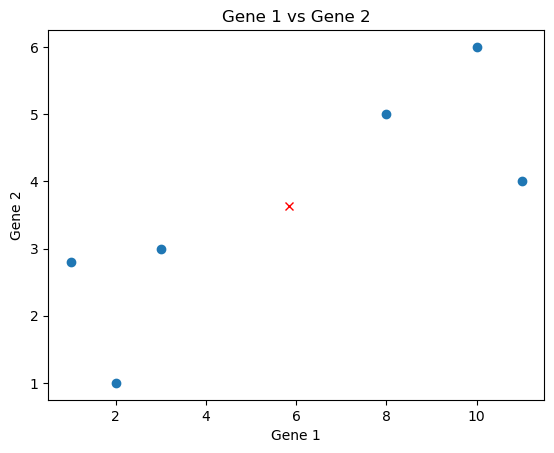

In [13]:
gene1 = [10, 11, 8, 3, 1 ,2]
gene2 = [6, 4, 5, 3, 2.8, 1]
plt.scatter(gene1, gene2)
plt.title("Gene 1 vs Gene 2")
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
gene1average = np.average(gene1)
gene2average = np.average(gene2)
plt.plot(gene1average, gene2average, 'rx')

<ul>
    <li> Next calculate the average measurement for Gene 1 and the average measurement for Gene 2.</li>
    <li> With the average values we can calculate the centre of the data </li>
    <li> From this point, we will focus on what happens in the graph, we no longer need the original data </li>
    <li> We will shift the data so that the centre is at the origin</li>
    </ul>

In [14]:
gene1 = gene1 - gene1average
gene2 = gene2 - gene2average
print(gene1)
print(gene2)

[ 4.16666667  5.16666667  2.16666667 -2.83333333 -4.83333333 -3.83333333]
[ 2.36666667  0.36666667  1.36666667 -0.63333333 -0.83333333 -2.63333333]


Text(0, 0.5, 'Gene 2')

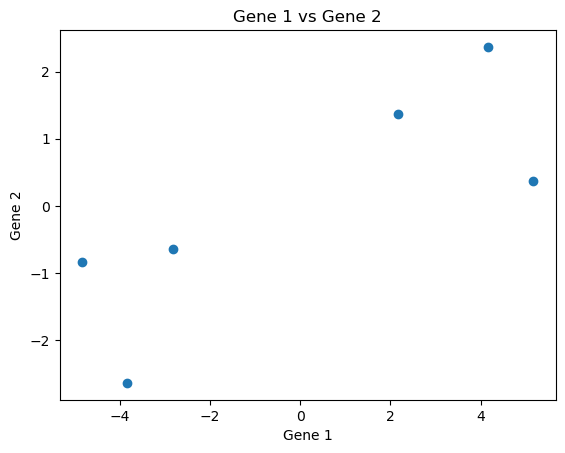

In [15]:
plt.scatter(gene1, gene2)
plt.title("Gene 1 vs Gene 2")
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")

<ul>
    <li> Shifting the data did not change how the data points are positioned relative to each other</li>
    <li> Now that the data is centred at the origin we can try to fit a line to it</li>
    <li> Start with a random line through the origin and rotate until it fits as good as possible </li>
    <li> We need to talk about how PCA decides if a fit is good or not</li>
    <li> Consider the starting random line through the original </li>
    <li> To quantify how good this line fits the data, PCA project the data onto it and then it can either measure the distances from the data to the line and try to find the line that minimises distances or </li>
    <li> It can try to find the line that maximises the distances from the projected points to the origin</li>
    <li> $a^2 = b^2 + c^2$ since $a$ is fixed as $b$ gets bigger $c$ must get smaller and vice versa</li>
    <li> PCA can either minimise $b$ or maximise $c$ </li>
    <li> Intuitively it is more obvious to minimise $b$... but it is actually easier to calculate c, the distance from the projected point to the origin, so PCA finds the best line by maximising the sum of the squared distances from the projected points to the origin </li>
    <li> Rotate the line to find largest SS(distances) </li>
    <li> This line is called Principal Component 1 or PC1 for short </li>
<ul>

In [16]:
from scipy import stats
slope, intercept, _, _, _=stats.linregress(gene1, gene2)
print(slope)
print(intercept)

0.32302284710017576
-1.6964884226316686e-16


<ul>
    <li>PC1 has a slope of $\frac{1}{3}$. In other words for every 3 units that we go along the gene1 axis we go up 1 unit in the gene2 axis</li>
    <li>This means that the data is mostly sprwad out along the gene1 axis.. and only a little bit spread out along the gene2 axis</li>
    <li>To make PC1 mix 3 parts gene1 and 1 part gene2</li>
    <li>The ratio of gene1 to gene2 tells you that gene1 is much more important when it comes to describing how the data is spread out</li>
    <li>PC1 is a linear combination of gene1 and gene2</li>
    <li> When you do PCA with Singular Value Decomposition (SVD) the recipe for PC1 is scaled so that its length is 1 </li>
    <li>$PC1 = \frac{3}{\sqrt(10)}gene1 + \frac{1}{\sqrt(10)}gene2$</li>

<ul>
    <li> The unit vector is called the Singular vector or the eigenvector for PC1</li>
    <li> The proportions of each gene are called "Loading Scores"</li>
    <li> PCA calls the average of the SS(distances) for the best fit line the eigenvalue for PC1</li>
    <li>$\frac{SS(distances for PC1)}{n-1} = Eigenvalue for PC1$</li>
    <li>$\sqrt(SS(distances for PC1)) = Singular value for PC1$</li>

<ul>
    <li> Because this is only 2D, PC2 is just the line through the origin that is perpendicular to PC1</li>
    <li> $PC2 = -1gene1 + 3gene2$</li>
    <li> Scaling to unit vector would give $PC2 = \frac{-1}{\sqrt(10)}gene1 + \frac{3}{\sqrt(10)}gene2$</li>
    <li> For PC2 gene2 is 3 times as important as gene1</li>
    <li> To draw the final PCA plot rotate everything so that PC1 is horizontal. Then see where sample points end up</li>
    <li> Eigenvalues are measures of variation </li>
    <li> Suppose the variation for PC1 was 15 and PC2 was 3. Total variation is 18</li>
    <li> This means PC1 explains 15/18 or 83% of the variance </li>
    <li> A scree plot is a graphical representation of the percentages of variation that each PC accounts for</li>
    <ul>
        

<b> PCA with 3 variables </b>
<ul>
    <li> Centre the data </li>
    <li> Find the line of best fit that goes through the origin - PC1</li>
    <li> $PC1 = 0.62gene1 + 0.15gene2 + 0.77gene2$ </li>
    <li> PC2 is the next best fitting line that goes through and it at right angles to PC1 </li>
    <li> $PC2 = 0.77gene1+0.62gene2 + 0.15gene3$</li>
    <li> PC3 is the best fitting line through the origin that is at right angles to both PC1 and PC2</li>
</ul>

<ul>
    <li> In there there is one PC per gene or (variable) but it practice, the number of principal components is either the number of variables or the number of samples, whichever is smaller</li>
    <li> Once we have all the PCs, you can use the eigenvalues to determine the proportion of variation that PC accounts for</li>
    <li> Suppose that PC1 accounts for 79%, PC2 15%, PC3 6%.</li>
    <li>PC1 and PC2 account for most of the variation. A 2D graph using just PC1 and PC2 would be a good approximation </li>
    </ul>

In [17]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [18]:
genes=['gene'+str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]


In [19]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rnd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rnd.randrange(10, 1000), size=5)

In [20]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  194  208  219  184  206  197  187  188  183  199
gene2  393  392  402  390  377  850  870  871  780  809
gene3  122  107  128  112  114  850  903  937  858  910
gene4   51   53   59   43   63  554  563  554  578  602
gene5  226  259  241  244  264  276  289  257  273  263


In [21]:
print(data.shape)

(100, 10)


In [22]:
print(data.describe())

        wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
count   100  100  100  100  100  100  100  100  100  100
unique   92   97   95   97   97   93   97   95   93   98
top     749  392  396  678  675  850  108  589  183  641
freq      3    2    3    2    2    2    2    2    2    2


In [23]:
scaled_data = preprocessing.scale(data.T)

In [24]:
print(scaled_data)

[[-0.22428065 -0.98342656 -0.98420857 -1.00941781 -1.89556517  0.78594029
   1.08973875  0.34596068  1.0514593  -1.59593124  0.81689945 -0.91267891
   0.88569631 -1.13211845  1.14794211 -0.63267449 -1.30901405 -0.84106774
   0.99163416 -1.02560883 -1.02159992  0.92822432 -0.85947162 -1.05770427
   1.06565744  0.06273361 -1.01254489  1.09478081  0.75818936 -1.02089005
   0.93258997 -1.31203999 -1.05071299  0.97164128  1.13632939  1.04311237
   0.88184917 -1.03481831 -0.98361355 -0.94474888 -1.12583199  1.09041461
  -0.83094076 -0.11375411 -0.03223703 -0.77564682  1.2110512  -0.7542754
  -0.94723335  0.89706155 -0.93803288 -0.93344686 -0.25099271 -1.00250833
  -0.9922522  -0.90058281 -1.19125614 -1.26721195  0.98532431  0.94464916
   0.94484656 -0.99483201 -0.99024607 -0.91071461 -0.97405496  1.1483561
   0.99533782 -0.87608108 -0.81212999  1.03364634  0.95209162 -0.8987273
  -0.82978819  1.02557515  0.67060676  1.03871112 -0.96991786  0.99302918
   0.97937319 -0.64033814 -0.13808181  0.

In [25]:
pca = PCA()

In [26]:
pca.fit(scaled_data)

PCA()

In [27]:
pca_data = pca.transform(scaled_data)

In [28]:
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
per_var

array([87.8,  2.8,  2.2,  2.1,  1.9,  1.2,  0.9,  0.6,  0.4,  0. ])

Text(0.5, 1.0, 'Scree plot')

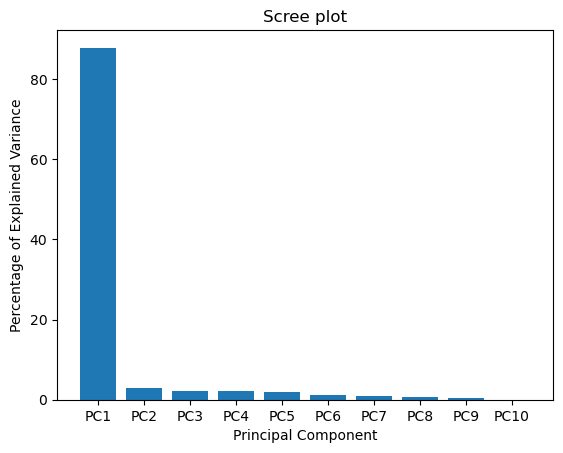

In [29]:
labels=["PC"+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree plot")

In [30]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.306553,1.292618,-0.850011,-0.433056,-0.266195,1.930598,-0.932371,0.159319,1.091976,-4.163336e-15
wt2,-9.520154,-2.248993,1.267782,-1.511468,-0.719263,0.774644,-0.378921,-1.030040,-0.799038,-8.326673e-17
wt3,-9.086760,1.051420,3.377850,1.032743,1.386113,-0.852767,0.255116,0.352631,0.263012,-3.330669e-16
wt4,-9.334198,0.181520,-2.149850,2.519005,0.370801,-0.502987,-0.774491,0.243775,-0.866210,1.665335e-15
wt5,-9.596666,-0.254965,-1.606287,-1.574921,-0.696747,-1.366685,1.793085,0.276821,0.326735,4.440892e-16
ko1,9.285658,2.861190,0.541395,-0.417322,-2.535144,-0.949953,-0.658203,-0.325823,-0.240684,-1.249001e-16
ko2,9.607055,-0.462109,-0.843372,-1.676195,2.562307,-1.135870,-1.144317,-0.346471,0.232937,1.665335e-15
ko3,9.278517,1.738042,-0.278413,0.039030,1.375445,1.677096,1.552248,-0.244281,-0.623290,3.330669e-16
ko4,9.373570,-2.164009,-0.018932,2.355996,-0.734315,-0.082331,0.512182,-0.904235,0.821468,1.110223e-16
ko5,9.299531,-1.994713,0.559837,-0.333813,-0.743002,0.508255,-0.224328,1.818304,-0.206906,6.661338e-16


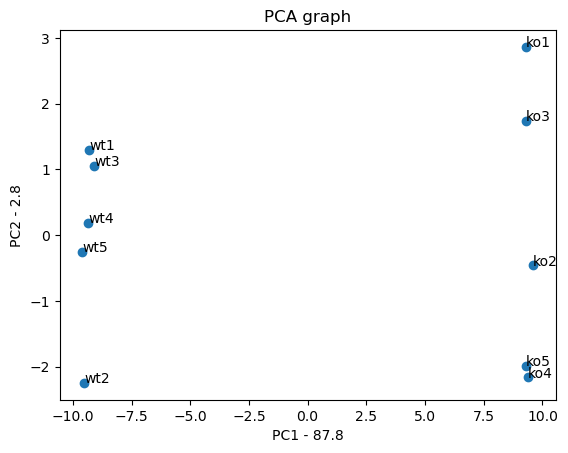

In [31]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel(f'PC1 - {per_var[0]}')
plt.ylabel(f'PC2 - {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [32]:
loading_scores = pd.Series(pca.components_[0], index=genes)

In [33]:
import sys
np.set_printoptions(threshold=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(loading_scores)

gene1     -0.054558
gene2      0.106046
gene3      0.106525
gene4      0.106548
gene5      0.075346
gene6     -0.104752
gene7     -0.106459
gene8      0.002564
gene9     -0.106496
gene10     0.087596
gene11    -0.106272
gene12     0.106383
gene13    -0.106385
gene14     0.091101
gene15    -0.098718
gene16     0.099684
gene17     0.097361
gene18     0.103619
gene19    -0.105960
gene20     0.106169
gene21     0.106472
gene22    -0.106515
gene23     0.101703
gene24     0.106223
gene25    -0.091186
gene26    -0.073744
gene27     0.106427
gene28    -0.106608
gene29    -0.104595
gene30     0.106323
gene31    -0.104232
gene32     0.094847
gene33     0.104913
gene34    -0.106507
gene35    -0.106515
gene36    -0.106672
gene37    -0.106501
gene38     0.106506
gene39     0.106105
gene40     0.105780
gene41     0.106323
gene42    -0.106457
gene43     0.104760
gene44    -0.082606
gene45    -0.031637
gene46     0.105437
gene47    -0.102714
gene48     0.098353
gene49     0.106417
gene50    -0.104701


In [34]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene79   -0.106694
gene36   -0.106672
gene87   -0.106659
gene65    0.106654
gene94    0.106640
gene28   -0.106608
gene60   -0.106607
gene77    0.106589
gene54    0.106565
gene61   -0.106558
dtype: float64


In [35]:
# Download fma_metadata.zip from https://github.com/mdeff/fma/blob/master/README.md

In [36]:
import pandas as pd
data = pd.read_csv("echonest.csv", skiprows=3)

In [37]:
data

,track_id,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.267070,11.20267,26.454180,751.147705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,NaN,...,-1.721207,4.686078,0.213789,0.208800,0.007911,0.06395,2.040730,1.97678,8.144532,147.040405
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,NaN,...,-0.647897,1.282306,0.214586,0.181860,0.011247,0.06240,0.922360,0.85996,1.794739,6.321268
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,NaN,...,-0.771613,1.623510,0.180471,0.128185,0.010103,0.06222,2.251160,2.18894,5.578341,89.180328
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,NaN,...,-2.054143,7.927149,0.250178,0.219205,0.014851,0.06390,1.487440,1.42354,2.173092,12.503966


In [38]:
data.drop(columns=data.columns[:26], axis=1, inplace=True)

In [39]:
data

,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,...,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249
0,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749
1,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085
2,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737
3,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809
4,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.267070,11.20267,26.454180,751.147705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,0.717013,0.686557,0.411056,0.342718,0.341934,0.482926,0.419219,0.408946,0.393060,0.382778,...,-1.721207,4.686078,0.213789,0.208800,0.007911,0.06395,2.040730,1.97678,8.144532,147.040405
13125,0.673395,0.846995,0.447772,0.425936,0.407817,0.405924,0.290565,0.314019,0.318129,0.310359,...,-0.647897,1.282306,0.214586,0.181860,0.011247,0.06240,0.922360,0.85996,1.794739,6.321268
13126,0.842368,0.719091,0.351503,0.354707,0.314619,0.276266,0.340571,0.342762,0.449963,0.456690,...,-0.771613,1.623510,0.180471,0.128185,0.010103,0.06222,2.251160,2.18894,5.578341,89.180328
13127,0.346748,0.311817,0.220864,0.185269,0.333642,0.290699,0.558345,0.397021,0.217570,0.297939,...,-2.054143,7.927149,0.250178,0.219205,0.014851,0.06390,1.487440,1.42354,2.173092,12.503966


In [40]:
data.describe()

,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,...,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249
count,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,...,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,0.448356,0.435871,0.365206,0.306067,0.365518,0.325732,0.332409,0.357958,0.321880,0.358277,...,-1.966002,10.745951,0.308984,0.255381,0.163876,0.068526,4.183428,4.114902,7.605432,138.932366
std,0.164809,0.166433,0.132484,0.118799,0.139493,0.124826,0.124180,0.131269,0.123401,0.134563,...,1.708499,20.053146,0.140164,0.083731,3.484144,0.010930,4.967481,4.967004,6.444884,225.584951
min,0.022635,0.020016,0.015092,0.014307,0.032791,0.014088,0.011858,0.011821,0.015987,0.006663,...,-17.966162,-1.867880,0.129023,0.098280,0.000518,0.060000,0.322180,0.224580,-3.566834,-1.687834
25%,0.332359,0.316432,0.275173,0.224428,0.268218,0.238666,0.246155,0.266214,0.235385,0.266039,...,-2.587326,1.229409,0.242371,0.208750,0.021321,0.063080,1.817050,1.749660,2.866906,15.565598
50%,0.445567,0.432219,0.355969,0.297733,0.352954,0.318924,0.325449,0.349882,0.313062,0.347999,...,-1.565120,4.355214,0.286014,0.242745,0.042146,0.064490,3.094060,3.026260,5.502340,55.874954
75%,0.560145,0.551585,0.442907,0.376437,0.448581,0.401922,0.408836,0.436413,0.397767,0.437743,...,-0.875471,11.407599,0.339086,0.285305,0.087516,0.070070,5.147530,5.079770,10.597994,175.938553
max,0.998426,0.985372,0.996535,0.990182,0.967532,0.950671,0.967767,0.991516,0.917841,0.939243,...,1.663782,423.621094,5.211423,1.680570,375.744781,0.342000,226.326767,226.244080,67.041878,4790.696777


In [41]:
scaled_data = preprocessing.scale(data)

In [43]:
pca = PCA(0.95)

In [44]:
X_pca = pca.fit_transform(scaled_data)

In [46]:
X_pca.shape

(13129, 94)

In [53]:
np.set_printoptions(threshold=sys.maxsize)
pca.explained_variance_ratio_

array([0.11773485, 0.0878559 , 0.04950397, 0.03376729, 0.02798128,
       0.02646274, 0.02393391, 0.0232637 , 0.02221744, 0.02106293,
       0.01975419, 0.01826856, 0.01801239, 0.01750632, 0.01711954,
       0.01650376, 0.01465765, 0.01420228, 0.01384474, 0.01270626,
       0.01202166, 0.01113946, 0.01067362, 0.01052375, 0.01006102,
       0.00959579, 0.00934412, 0.00901824, 0.00872654, 0.00843965,
       0.00787255, 0.00738707, 0.0072835 , 0.00727199, 0.00720828,
       0.00701254, 0.00671797, 0.00664122, 0.00645049, 0.00632164,
       0.00592082, 0.0057993 , 0.00567735, 0.00551823, 0.00545951,
       0.00539506, 0.00531008, 0.0050831 , 0.0049347 , 0.00481517,
       0.00476601, 0.00471844, 0.00466248, 0.00463887, 0.00449322,
       0.00434597, 0.00426935, 0.00425045, 0.0040646 , 0.00397439,
       0.00389219, 0.00373503, 0.00364512, 0.00357731, 0.00345626,
       0.00342772, 0.0032373 , 0.00314902, 0.00295098, 0.00290221,
       0.0028494 , 0.00277843, 0.00273319, 0.00268046, 0.00264

<ul>
    <li><b>Advantages and disadvantages of PCA</b></li>
    <li><b>Dimensionality reduction</b>: By reducing the number of variables PCA simplifies data analysis, improves performance and makes it easier to visualize data</li><li><b>Advantages and disadvantages of PCA</b></li>
    <li><b>Feature selection</b>: PCA can be used for feature selection, which is the process of selecting the most important variables in a dataset. This is useful in machine learning where the number of variables can be very large, and it is difficult to identify which are the most important</li>
    <li><b>Data Visualisation</b>: PCA can be used for data visualization. By reducing the number of variables, PCA can plot high-dimensional data in 2 or 3 3 dimensions, making it easier to interpret</li>
    <li><b>Multicolinearity</b>: PCA can be used to deal with multicolinearity, which is a common problem in a regression analysis where two or more independent variables are highly correlated. PCA can help identify the underlying structure in the data and create new, uncorrelated variables that can be used in the regression model</li>
    <li><b>Noise Reduction</b>: PCA can be used to reduce noise in data. By removing principal components with low variance, which are assumed to represent noise, PCA can improve the signal-to-noise ratio and make it easier to identify the underlying structure of the data</li>
    <li><b>Data Compression</b>:PCA can b used for data compression. By representing the data using a smaller number of principal components, which capture most of the variation in the data, PCA can reduce storage requirements and speed up processing</li>
    <li><b>Outlier detection</b>: PCA can be used for outlier detection. Outliers are points that are significantly different from the other points in the dataset (me in this class). PCA can identify outliers by looking for data points that are far away from the other points in the principal component space</li>
    <li><b>Disadvantages</b></li>
    <li><b>Interpretation of Principal Components</b>: The principal components created by PCA are linear combinations of the original variables and it is often difficult to interpret them in terms of the original variables. This can make it difficult to explain the results of PCA to others.</li>
    <li><b>Data Scaling</b>: PCA is sensitive to the scale of the data. If the data is not properly scaled, then PCA will not work well. It is crucial to scale the data before doing PCA</li>
    <li><b>Information Loss</b>: PCA can result in information loss. While PCA reduces the number of variables, it can lead to loss of information. The degree of information loss depends on the number if principal components selected. Therefore it is important to carefully select the number of principal components to retain.</li>
    <li><b>Non-linear relationships</b>:PCA assumes that the relationships between variables are linear. If they are non-linear then PCA will not work well.</li>
    <li><b>Computational Complexity</b>Computing PCA can be computationally expensive for larage datasets. This is expecially true of the number of variables in the dataset is large. For n points with p features the complexity of PCA is $O(p^2n+p^3)$</li>
    <li><b>Overfitting</b>: PCA can result in overfitting, which is when the model fits the training data too well and doesn't generalise. This can happen if too many principal components are used or the model is trained on a dataset that is too small</li>
    